# [Research Request - Service Data for SJCOG #1476](https://github.com/cal-itp/data-analyses/issues/1476)

explore trying to answer these questions from the issue:

>- share some information from NTD on what % of services are provided by SJRTD.
>- see if NTD can help us tell what each operators need is for that region.
>- see if NTD shows you the operations just in a particular UZA. 
>- Are you able to see specifically within the Tracy boundaries which percentage of service is provided by City of Tracy vs SJRTD?
>- Can NTD tell you the funding for each operator by source?
>- Can you tell what level of 5307, 5311, TDA, LCTOP etc they [operators?] get from there?

Found that [FTA publishes resources and tables related to apportionments](https://www.transit.dot.gov/funding/apportionments/apportionment-resources), including [the data used to calculate apportionments for multiple formula grant programs (5307, STIC, 5311, etc)](https://www.transit.dot.gov/funding/apportionments/formula-apportionments-data). 

Specifially, the data in [National Transit Database Data Used for the Small Transit Intensive Cities (STIC) Apportionments](https://www.transit.dot.gov/funding/apportionments/national-transit-database-data-used-small-transit-intensive-cities-stic) may help answer these questions as it displays the metrics (UPT, VRM, VRH etc) useed to calculate apportionments.


In [1]:
import altair as alt
import pandas as pd
from calitp_data_analysis.tables import tbls
from siuba import _, collect, count, filter, group_by, select, show_query, summarize

# from update_vars import GCS_FILE_PATH, NTD_MODES, NTD_TOS

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
import geopandas as gpd
import gcsfs
import google.auth

credentials, project = google.auth.default()
fs = gcsfs.GCSFileSystem(token=credentials)

In [3]:
# list Cities in San Joaquin County
sj_cities = [
    "Stockton",
    "Escalon",
    "Tracy",
    "Lathrop",
    "Lodi",
    "Manteca",
    "Mountain House",
    "Ripon",
    "Acampo",
    "French Camp",
    "Garden Arcres",
]

[Table 3. FY 2025 Section 5307 and 5340 Urbanized Area Formula Appropriations (Full Year)](https://www.transit.dot.gov/funding/apportionments/table-3-fy-2025-section-5307-and-5340-urbanized-area-formula-0)
confirms the total apportionment dollars for the SJCOG region sent by Wendy. 
<br>Note: Pivot Tables were used to transform the excel data.
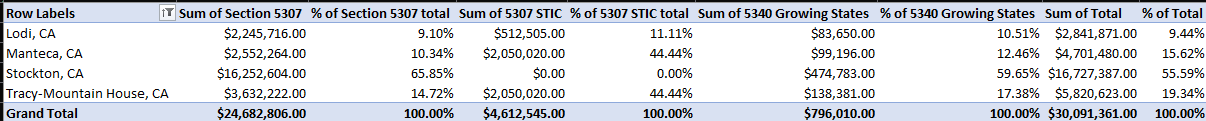

[Table 6. FY 2025 Section 5307 Small Transit Intensive Cities Apportionments (Full Year)](https://www.transit.dot.gov/funding/apportionments/table-6-fy-2025-section-5307-small-transit-intensive-cities-apportionments-0) 
display the 5307 STIC apportionments for the regions (this tabled does not include Stockton UZA)
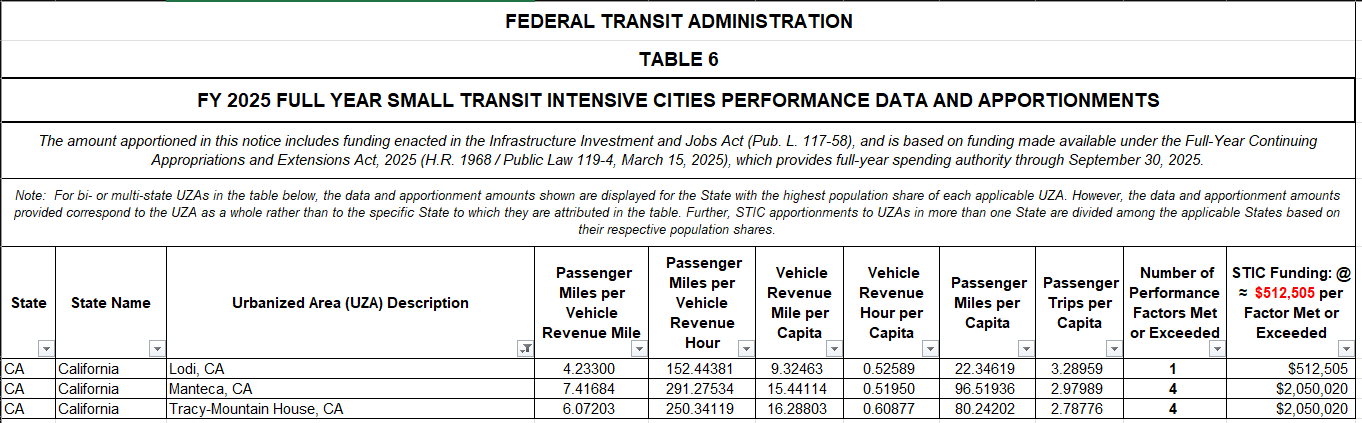

## 1. See if NTD can help us tell what each operators need is for that region.

Need some clarity on what `need` means in this context.

## 2. see if NTD shows you the operations just in a particular UZA.
[National Transit Database Data Used for the Small Transit Intensive Cities (STIC) Apportionments](https://www.transit.dot.gov/funding/apportionments/national-transit-database-data-used-small-transit-intensive-cities-stic). shows the data use to calculate the apportionment of STIC funds for 2025 by uza and/or agency 

Below is the `STIC Apportionment` tab filtered by the UZAs in the  SJ region
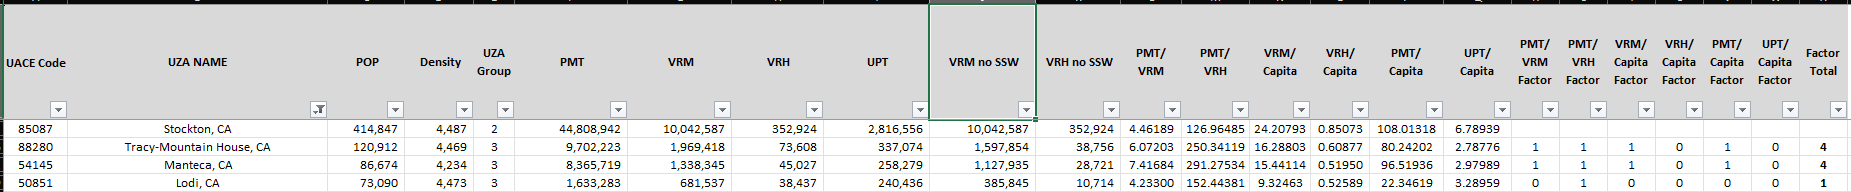

below is the `STIC by Agency` tab filtered by the UZAs in the SJ region. This tab excludes Stockton UZA
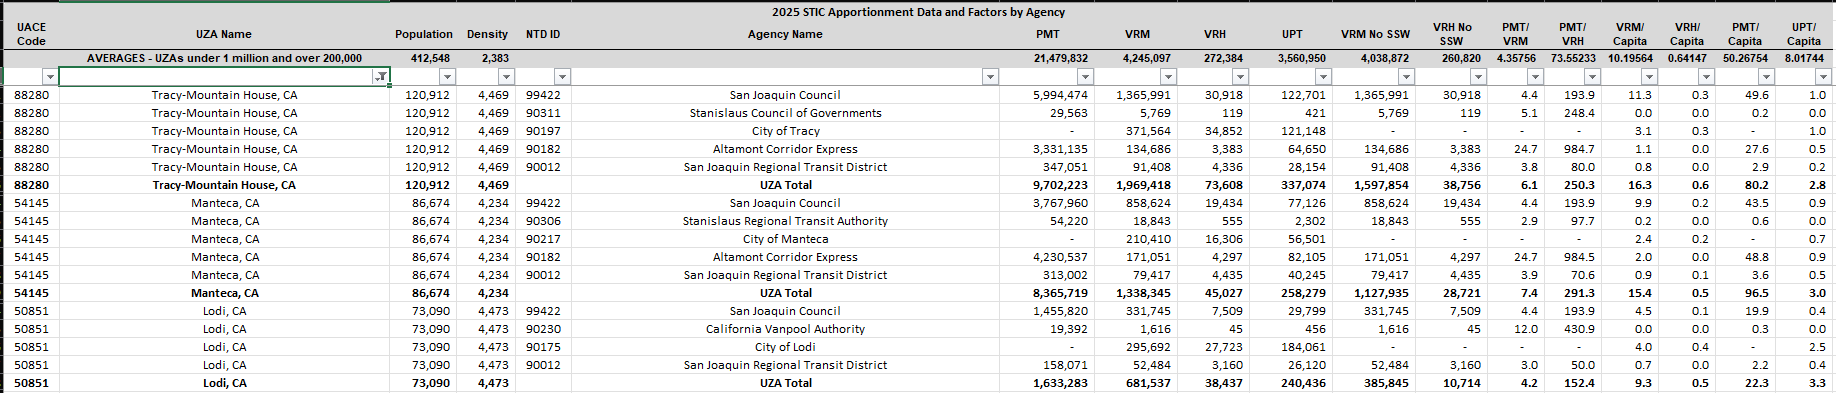

The [National Transit Database Data Used for the Section 5307 Urbanized Area Formula and Section 5339 Bus Formula Apportionments](https://www.transit.dot.gov/funding/apportionments/national-transit-database-data-used-section-5307-urbanized-area-formula-and) displays the operations for Stockton UZA
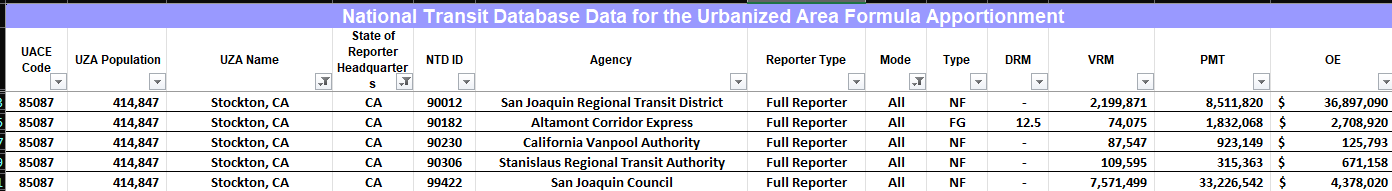


## 3. Are you able to see specifically within the Tracy boundaries which percentage of service is provided by City of Tracy vs SJRTD?
[National Transit Database Data Used for the Small Transit Intensive Cities (STIC) Apportionments](https://www.transit.dot.gov/funding/apportionments/national-transit-database-data-used-small-transit-intensive-cities-stic), shows service metrics used for apportionment calculation. 

Below is a pivot table showing the % of service metrics for `City of Tracy` vs `SJRTD` in the Tracy UZA
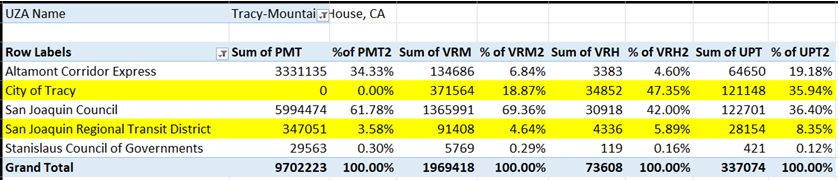


## 4. Can NTD tell you the funding for each operator by source?
## & 
## 5. Can you tell what level of 5307, 5311, TDA, LCTOP etc they [operators?] get from there?
FTA has 2 datasets for federal and state funding for agencies:

- [2022 - 2023 NTD Annual Data - Funding Sources (Federal)](https://data.transportation.gov/Public-Transit/2022-2023-NTD-Annual-Data-Funding-Sources-Federal-/qpjk-b3zw/about_data) 
- [2022 - 2023 NTD Annual Data - Funding Sources (State)](https://data.transportation.gov/Public-Transit/2022-2023-NTD-Annual-Data-Funding-Sources-State-/dd43-h6wv/about_data)

Federal table can tell us the amount of 5307 (urbanized area funds) and 5311 funds go to each operator for 2022-2023. However, the state table does not display specific funding names.

In [4]:
# equivilent to"2022 - 2023 NTD Annual Data - Funding Sources (Federal)" 
# https://data.transportation.gov/Public-Transit/2022-2023-NTD-Annual-Data-Funding-Sources-Federal-/qpjk-b3zw/about_data
fund_source_fed = (
    tbls.mart_ntd_annual_reporting.fct_funding_sources_federal()
    >> filter(
        _.state == "CA",
        _.city.isin(sj_cities)

    )
    >> group_by(
        _.agency_name, 
        _.ntd_id, 
        _.reporter_type, 
        _.uza_name,
        _.city
    )
    >> summarize(
        total_5309_funds=_.fta_capital_program_5309.sum(),
        total_5311_funds=_.fta_rural_progam_5311.sum(),
        total_urbanized_area_funds=_.fta_urbanized_area_formula.sum(),
    )
    >> collect()
)

In [5]:
fund_source_fed

,agency_name,ntd_id,reporter_type,uza_name,city,total_5309_funds,total_5311_funds,total_urbanized_area_funds
0,City of Escalon,91078,Rural Reporter,None,Escalon,0.0,128447.0,0.0
1,"City of Lodi, dba: GrapeLine",90175,Reduced Reporter,"Lodi, CA",Lodi,0.0,0.0,2829407.0
2,"City of Manteca, dba: Manteca Transit",90217,Reduced Reporter,"Manteca, CA",Manteca,0.0,0.0,2785782.0
3,"City of Escalon, dba: eTrans",91078,Reduced Reporter,"Modesto, CA",Escalon,0.0,126606.0,0.0
4,"San Joaquin Regional Transit District, dba: Sa...",90012,Full Reporter,"Stockton, CA",Stockton,0.0,1269577.0,17219730.0
5,San Joaquin Regional Transit District,90012,Full Reporter,"Stockton, CA",Stockton,0.0,1447381.0,17046394.0
6,Altamont Corridor Express,90182,Full Reporter,"Stockton, CA",Stockton,11946856.0,0.0,42230870.0
7,San Joaquin Council,99422,Full Reporter,"Stockton, CA",Stockton,0.0,0.0,0.0
8,"San Joaquin Council, dba: Dibs",99422,Full Reporter,"Stockton, CA",Stockton,0.0,0.0,0.0
9,"City of Tracy, dba: TRACER",90197,Reduced Reporter,"Tracy--Mountain House, CA",Tracy,0.0,0.0,2661252.0


In [6]:
# equivilent to "https://data.transportation.gov/Public-Transit/2022-2023-NTD-Annual-Data-Funding-Sources-State-/dd43-h6wv/about_data"

fund_source_state = (
    tbls.mart_ntd_annual_reporting.fct_funding_sources_state()
    >> filter(
        _.state == "CA",
        _.city.isin(sj_cities)

    )
    >> group_by(
        _.agency_name, 
        _.ntd_id, 
        _.reporter_type, 
        _.uza_name,
        _.city
    )
    >> summarize(
        total_gen_funds=_.general_funds.sum(),
        total_transportation_funds=_.transportation_funds.sum(),
        total_reduced_reporter_funds=_.reduced_reporter_funds.sum(),
    )
    >> collect()
)

In [7]:
fund_source_state

,agency_name,ntd_id,reporter_type,uza_name,city,total_gen_funds,total_transportation_funds,total_reduced_reporter_funds
0,City of Escalon,91078,Rural Reporter,None,Escalon,0.0,0.0,32944.0
1,"City of Lodi, dba: GrapeLine",90175,Reduced Reporter,"Lodi, CA",Lodi,0.0,0.0,445011.0
2,"City of Manteca, dba: Manteca Transit",90217,Reduced Reporter,"Manteca, CA",Manteca,0.0,0.0,3339468.0
3,"City of Escalon, dba: eTrans",91078,Reduced Reporter,"Modesto, CA",Escalon,0.0,0.0,147933.0
4,"San Joaquin Regional Transit District, dba: Sa...",90012,Full Reporter,"Stockton, CA",Stockton,1624806.0,0.0,0.0
5,San Joaquin Regional Transit District,90012,Full Reporter,"Stockton, CA",Stockton,3315549.0,0.0,0.0
6,Altamont Corridor Express,90182,Full Reporter,"Stockton, CA",Stockton,19875244.0,29132862.0,0.0
7,San Joaquin Council,99422,Full Reporter,"Stockton, CA",Stockton,0.0,0.0,0.0
8,"San Joaquin Council, dba: Dibs",99422,Full Reporter,"Stockton, CA",Stockton,0.0,0.0,0.0
9,"City of Tracy, dba: TRACER",90197,Reduced Reporter,"Tracy--Mountain House, CA",Tracy,0.0,0.0,3735134.0


---

## Transit Service Intensity

See if Transit Service Intensity (TSI) data can tell us the amount of VRM/VRH is provided by an operator in the UZAs, via their GTFS data (as opposed to NTD data).

[Epic - Transit Service Intensity #1091](https://github.com/cal-itp/data-analyses/issues/1091)

In [8]:
tsi_url = "gs://calitp-analytics-data/data-analyses/transit_service_intensity/test_tsi_statewide_2025-04-16.geojson"

In [9]:
# tsi_data = gpd.read_file(
#     tsi_url,
#     storage_options={"token": credentials.token}
# )

In [10]:
from calitp_data_analysis import *
fs = get_fs()
with fs.open(tsi_url) as f:
    tsi_data=gpd.read_file(f)

In [11]:
tsi_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tract            7394 non-null   object  
 1   pop_sq_mi        7394 non-null   float64 
 2   population       7394 non-null   int64   
 3   daily_vrm_miles  7394 non-null   float64 
 4   daily_vrh_hours  7394 non-null   float64 
 5   geometry         7394 non-null   geometry
dtypes: float64(3), geometry(1), int64(1), object(1)
memory usage: 346.7+ KB


In [12]:
tsi_data.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

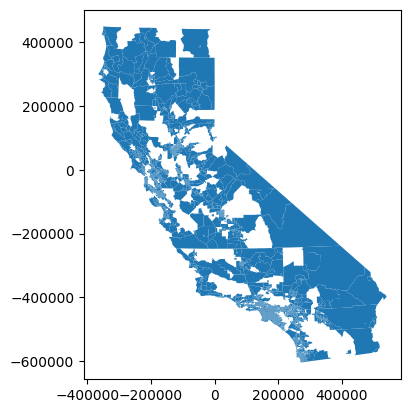

In [13]:
tsi_data.plot()

In [14]:
# CA Counties
county_url="https://caltrans-gis.dot.ca.gov/arcgis/rest/services/CHboundary/County_Boundaries/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"

county_map=gpd.read_file(
    county_url,
    storage_options={"token": credentials.token}
)

<AxesSubplot:>

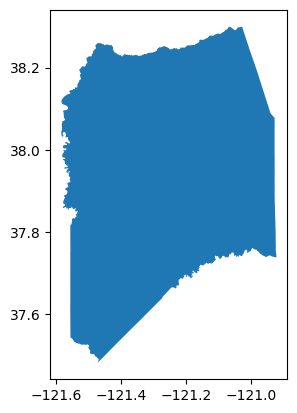

In [15]:
sj = county_map[county_map["NAME10"]=="San Joaquin"]
sj.plot()

In [16]:
# UZA map
uza_url="https://caltrans-gis.dot.ca.gov/arcgis/rest/services/CHboundary/Adjusted_Urban_Area/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
uza_map=gpd.read_file(
    uza_url,
    storage_options={"token": credentials.token}
)

In [17]:
uza_list =[
    "Stockton, CA",
    "Tracy--Mountain House, CA",
    "Manteca, CA",
    "Lodi, CA"
]
sj_uza= uza_map[uza_map["NAME"].isin(uza_list)]

<AxesSubplot:>

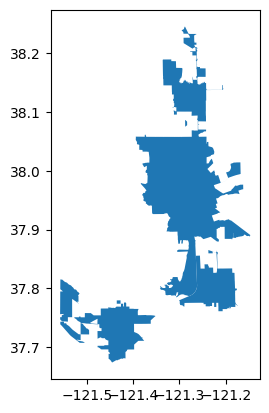

In [18]:
sj_uza.plot()

In [19]:
uza_tsi_overlay = sj_uza.overlay(tsi_data.to_crs("EPSG:4326"),how='intersection')

In [20]:
uza_tsi_overlay.explore()

## Statewide analysis
Using the same STIC data table, create an aggregation for all operaotrs in the UZAs and calculate the % of vrm, vrh, upt used.

https://www.transit.dot.gov/funding/apportionments/national-transit-database-data-used-small-transit-intensive-cities-stic

display TSI data (by operator) to map with tool tips of metrics

display all the uza stic data: ops in UZA, counts, % of metrics for the UZA. 
- alt map, heat map of different metrics?


In [21]:
import requests

stic_url = "https://www.transit.dot.gov/sites/fta.dot.gov/files/2025-01/FY-2025-5307-STIC-NTD-Data-09-01-2024.xlsx"
headers = {
    'User-Agent': 'CalITP/1.0.0',
    'sec-ch-ua': '"CalITP";v="1"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"'
}

response = requests.get(stic_url, headers=headers)
response

<Response [200]>

In [22]:
stic = pd.read_excel(
    response.content,
    sheet_name="STIC by Agency",
    header=1,
    usecols=list(range(0,11))
)

In [24]:
stic.columns

Index(['UACE Code', 'UZA Name', 'Population', 'Density', 'NTD ID',
       'Agency Name', 'PMT', 'VRM', 'VRH', 'UPT', 'VRM No SSW'],
      dtype='object')

In [27]:
group_cols=[
    "UACE Code",
    "UZA Name",
    "NTD ID",
    "Agency Name"
]

agg_cols=dict(
    total_pmt=("PMT","sum"),
    total_vrm=("VRM","sum"),
    total_vrh=("VRH","sum"),
    total_upt=("UPT","sum")
)


agency_agg= stic[
    (stic["UACE Code"].notna()) &
    (stic["Agency Name"]!="UZA Total") & 
    (stic["UZA Name"].str.contains(", CA"))
].groupby(group_cols).agg(**agg_cols).reset_index()

uza_agg = stic[
    (stic["UACE Code"].notna()) &
    (stic["Agency Name"]!="UZA Total") & 
    (stic["UZA Name"].str.contains(", CA"))
].groupby(["UACE Code","UZA Name"]).agg(**agg_cols).reset_index()


display(
    agency_agg.head(),
    uza_agg.head()
)


,UACE Code,UZA Name,NTD ID,Agency Name,total_pmt,total_vrm,total_vrh,total_upt
0,3196.0,"Arroyo Grande-Grover Beach-Pismo Beach, CA",90062.0,Monterey-Salinas Transit,80268.0,14696.0,333.0,2017.0
1,3196.0,"Arroyo Grande-Grover Beach-Pismo Beach, CA",90206.0,San Luis Obispo Regional Transit Authority,2591460.0,520105.0,25864.0,242906.0
2,3196.0,"Arroyo Grande-Grover Beach-Pismo Beach, CA",90230.0,California Vanpool Authority,342096.0,28508.0,1961.0,20448.0
3,12754.0,"Camarillo, CA",90151.0,Southern California Regional Rail Authority,0.0,0.0,0.0,0.0
4,12754.0,"Camarillo, CA",90154.0,Los Angeles County Metropolitan Transportation...,0.0,0.0,0.0,0.0


,UACE Code,UZA Name,total_pmt,total_vrm,total_vrh,total_upt
0,3196.0,"Arroyo Grande-Grover Beach-Pismo Beach, CA",3013824.0,563309.0,28158.0,265371.0
1,12754.0,"Camarillo, CA",0.0,374301.0,20667.0,67360.0
2,16318.0,"Chico, CA",2641521.0,1045508.0,78215.0,561848.0
3,22420.0,"Davis, CA",7362078.0,1166256.0,91253.0,3187438.0
4,26405.0,"El Centro, CA",8765414.0,1173083.0,53936.0,626094.0


In [32]:
merge = agency_agg.merge(
    uza_agg,
    on=["UACE Code", "UZA Name" ],
    how="inner",
    indicator=True
).rename(
    columns={
        "total_pmt_y":"total_uza_pmt",
        "total_vrm_y":"total_uza_vrm",
        "total_vrh_y":"total_uza_vrh",
        "total_upt_y":"total_uza_upt",
    }
)

merge.columns

Index(['UACE Code', 'UZA Name', 'NTD ID', 'Agency Name', 'total_pmt_x',
       'total_vrm_x', 'total_vrh_x', 'total_upt_x', 'total_uza_pmt',
       'total_uza_vrm', 'total_uza_vrh', 'total_uza_upt', '_merge'],
      dtype='object')

In [33]:
merge # need to calculate percentage of metrics. total_upt/total_uza_upt

,UACE Code,UZA Name,NTD ID,Agency Name,total_pmt_x,total_vrm_x,total_vrh_x,total_upt_x,total_uza_pmt,total_uza_vrm,total_uza_vrh,total_uza_upt,_merge
0,3196.0,"Arroyo Grande-Grover Beach-Pismo Beach, CA",90062.0,Monterey-Salinas Transit,80268.0,14696.0,333.0,2017.0,3013824.0,563309.0,28158.0,265371.0,both
1,3196.0,"Arroyo Grande-Grover Beach-Pismo Beach, CA",90206.0,San Luis Obispo Regional Transit Authority,2591460.0,520105.0,25864.0,242906.0,3013824.0,563309.0,28158.0,265371.0,both
2,3196.0,"Arroyo Grande-Grover Beach-Pismo Beach, CA",90230.0,California Vanpool Authority,342096.0,28508.0,1961.0,20448.0,3013824.0,563309.0,28158.0,265371.0,both
3,12754.0,"Camarillo, CA",90151.0,Southern California Regional Rail Authority,0.0,0.0,0.0,0.0,0.0,374301.0,20667.0,67360.0,both
4,12754.0,"Camarillo, CA",90154.0,Los Angeles County Metropolitan Transportation...,0.0,0.0,0.0,0.0,0.0,374301.0,20667.0,67360.0,both
5,12754.0,"Camarillo, CA",90163.0,City of Camarillo,0.0,374301.0,20667.0,67360.0,0.0,374301.0,20667.0,67360.0,both
6,12754.0,"Camarillo, CA",90164.0,Ventura County Transportation Commission,0.0,0.0,0.0,0.0,0.0,374301.0,20667.0,67360.0,both
7,12754.0,"Camarillo, CA",90165.0,City of Thousand Oaks,0.0,0.0,0.0,0.0,0.0,374301.0,20667.0,67360.0,both
8,16318.0,"Chico, CA",90208.0,Butte County Association of Governments,2641521.0,1045508.0,78215.0,561848.0,2641521.0,1045508.0,78215.0,561848.0,both
9,22420.0,"Davis, CA",90090.0,Yolo County Transportation District,904837.0,417507.0,19631.0,145777.0,7362078.0,1166256.0,91253.0,3187438.0,both
